In [1]:
import numpy as np

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('F:Dataset/creditcard.csv')
df.head()
# in class 1 - fraud and 0 - valid transaction

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
x = df.iloc[:,:-1]
y = df['Class']

In [11]:
x_scaled = scale(x)
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x_scaled)

In [12]:
x_reduced

array([[ 0.40131574, -2.51636065],
       [-0.38984104, -2.08414749],
       [ 1.87709139, -2.51738007],
       ...,
       [-0.20584973,  2.00436162],
       [-0.48936469,  1.22777272],
       [ 0.76696581,  1.9216749 ]])

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_reduced,y,test_size = 0.33)

In [17]:
# n_clusters this is K in K means 
kmeans = KMeans(init = 'k-means++', n_clusters = 2, n_init=20,max_iter=3000,verbose=1)
kmeans.fit(x_train)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 632370.0872272297
start iteration
done sorting
end inner loop
Iteration 1, inertia 611791.2283556889
start iteration
done sorting
end inner loop
Iteration 2, inertia 579138.9772412551
start iteration
done sorting
end inner loop
Iteration 3, inertia 554180.6823566448
start iteration
done sorting
end inner loop
Iteration 4, inertia 537107.5075244963
start iteration
done sorting
end inner loop
Iteration 5, inertia 522909.75303589646
start iteration
done sorting
end inner loop
Iteration 6, inertia 513034.93744997535
start iteration
done sorting
end inner loop
Iteration 7, inertia 506285.3208349385
start iteration
done sorting
end inner loop
Iteration 8, inertia 501920.92466655624
start iteration
done sorting
end inner loop
Iteration 9, inertia 498878.11610076355
start iteration
done sorting
end inner loop
Iteration 10, inertia 497036.58592168096
start iteration
done sorting
end inner loop
Iteration 11,

Iteration 0, inertia 485925.90304564754
start iteration
done sorting
end inner loop
Iteration 1, inertia 433776.2819466483
start iteration
done sorting
end inner loop
Iteration 2, inertia 423400.92374938657
start iteration
done sorting
end inner loop
Iteration 3, inertia 422245.3613073632
start iteration
done sorting
end inner loop
Iteration 4, inertia 422083.1444775534
start iteration
done sorting
end inner loop
Iteration 5, inertia 422038.06725913705
start iteration
done sorting
end inner loop
Iteration 6, inertia 422021.0166270413
center shift 1.091147e-02 within tolerance 1.782322e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 426354.50405613333
start iteration
done sorting
end inner loop
Iteration 1, inertia 422376.7252719108
start iteration
done sorting
end inner loop
Iteration 2, inertia 422051.39224844397
start iteration
done sorting
end inner loop
Iteration 3, inertia 422022.2616863286
center shift 1.200178e-02 within tolerance 1.7

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=3000,
    n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

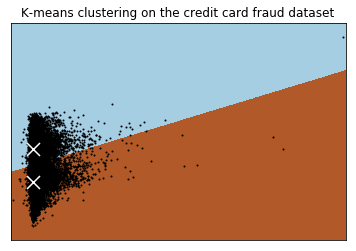

In [21]:
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = x_reduced[:, 0].min() - 1, x_reduced[:, 0].max() + 1
y_min, y_max = x_reduced[:, 1].min() - 1, x_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(x_reduced[:, 0], x_reduced[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the credit card fraud dataset')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [23]:
predictions = kmeans.predict(x_test)
pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y_test == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))
pred_good = np.where(predictions == 0)[0]
real_good = np.where(y_test == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))
false_neg_rate = false_neg/(false_pos+false_neg)
accuracy = (len(x_test) - (false_neg + false_pos)) / len(x_test)

In [24]:
accuracy

0.4518816432059753